In [12]:
from spacerocks import SpaceRock, RockCollection
from spacerocks.time import Time
from spacerocks.observing import Observatory
from spacerocks.spice import SpiceKernel
from spacerocks.nbody import Simulation, Integrator, Force

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")
kernel.load("/Users/kjnapier/data/spice/sb441-n16s.bsp")

In [13]:
origin = "SSB"
reference_plane = "EclipJ2000"

In [14]:
epoch = Time.now()
t0 = epoch.epoch
duration = 100_000 * 365.25
step_frquency = 1_000
nsteps = int(duration / step_frquency)
epochs = [epoch + duration / nsteps * idx for idx in range(nsteps)]

In [15]:
while True:
    rock = SpaceRock.random(epoch=epoch, reference_plane=reference_plane, origin=origin)
    if rock.e() < 1.0:
        if rock.q() < 10.0:
            break
        
name = rock.name

In [16]:
rock.q()

4.721056056072688

In [17]:
sim = Simulation.planets(rock.epoch, "ECLIPJ2000", origin)
sim.set_integrator(Integrator.leapfrog(2.0))
# sim.set_integrator(Integrator.ias15(2.0))
sim.add(rock)

sim.move_to_center_of_mass()

In [18]:
results = RockCollection()

for epoch in epochs:
    sim.integrate(epoch)
    rock = sim.get_particle(name)
    results.add(rock)

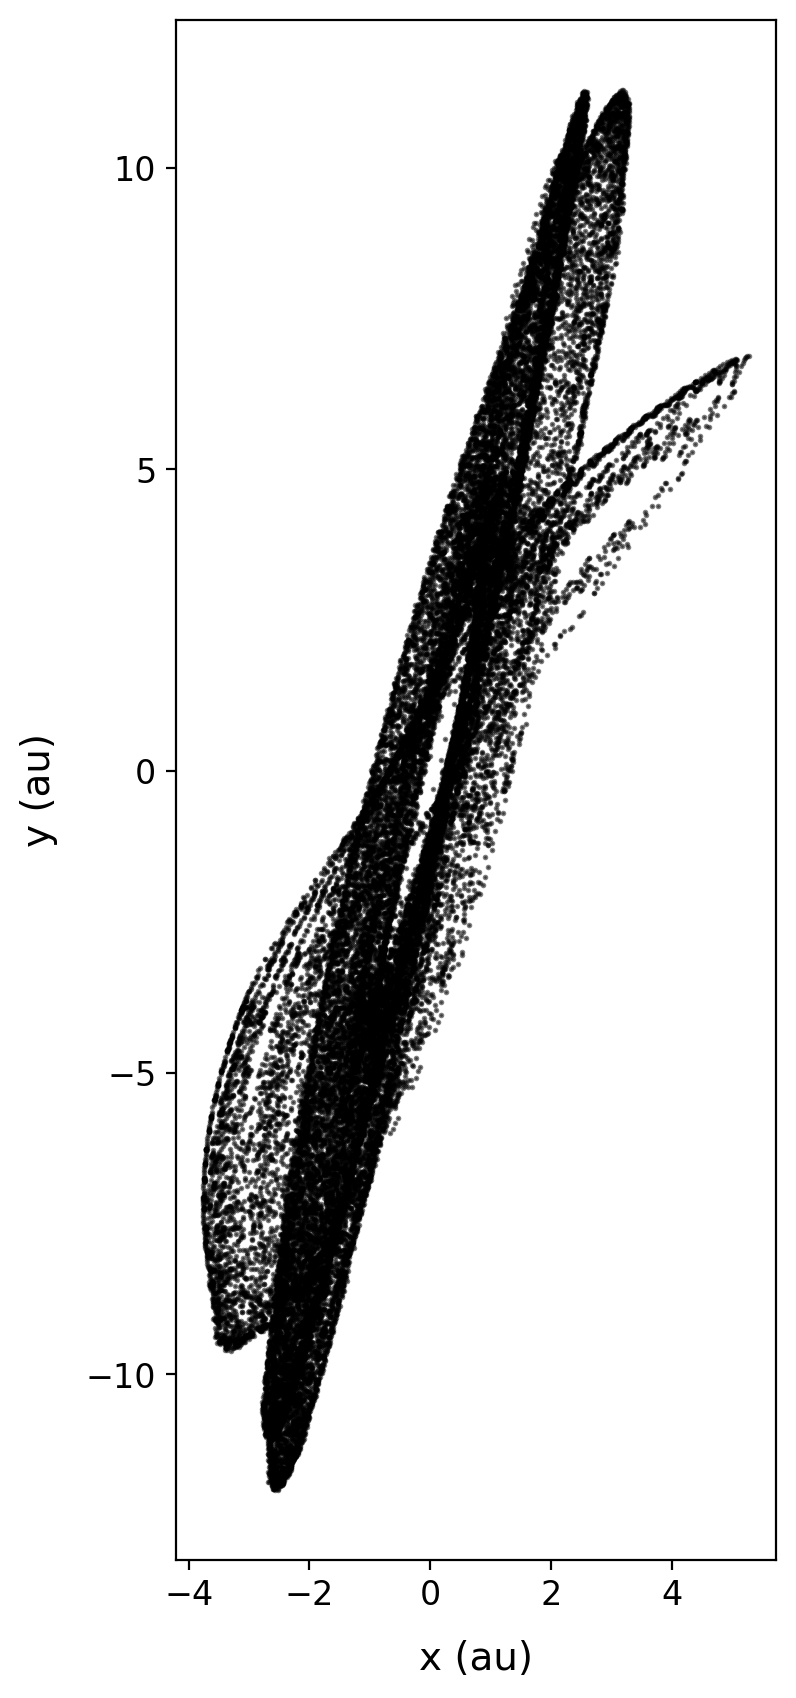

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(results.x, results.y, s=1, c='black', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('x (au)', fontsize=14, labelpad=10)
ax.set_ylabel('y (au)', fontsize=14, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

In [20]:
years = [(epoch.jd() - epochs[0].jd()) / 365.25 for epoch in epochs]

Text(0.5, 0, 'Time (years)')

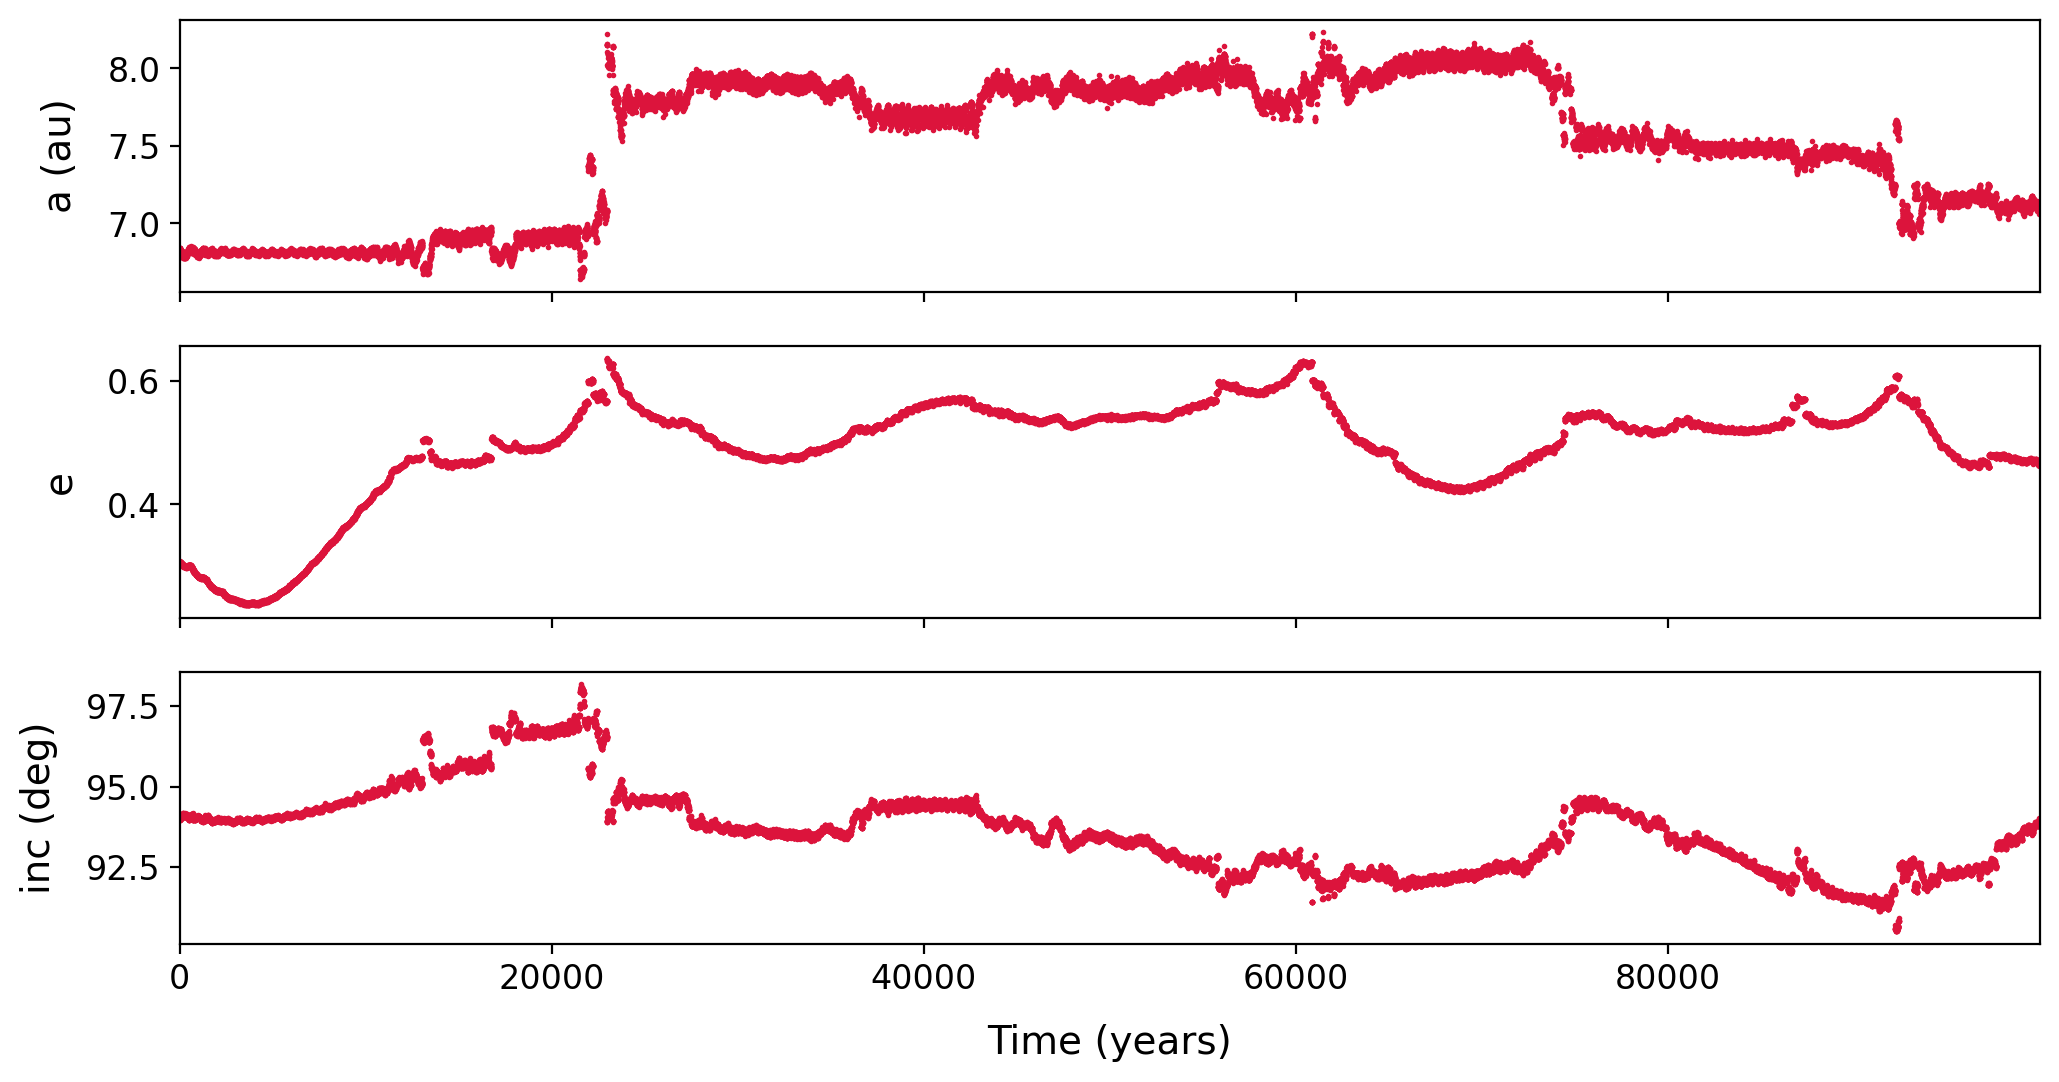

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
ax[0].scatter(years, results.a(), color='crimson', s=1)
ax[0].set_ylabel('a (au)', fontsize=14, labelpad=10)
ax[1].scatter(years, results.e(), color='crimson', s=1)
ax[1].set_ylabel('e', fontsize=14, labelpad=10)
ax[2].scatter(years, np.degrees(results.inc()), color='crimson', s=1)
ax[2].set_ylabel('inc (deg)', fontsize=14, labelpad=10)

for idx in range(3):
    ax[idx].tick_params(axis='both', which='major', labelsize=12)
    ax[idx].set_xlim(years[0], years[-1])
    #ax[idx].set_ylim(bottom=0.0)
    
ax[2].set_xlabel('Time (years)', fontsize=14, labelpad=10)